In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Hopfield_Net():
    """
        - X is the input matrix where each column is a sample
        - W is a matrix of the weights.
        
    """
    def __init__(self, X, bias = 0):
        self.X = X
        self.D = X.shape[0] # Number of units
        self.N = X.shape[1] # Number of patterns
        self.bias = bias
        self.avg_act = self.calc_avg_act()
        self.W = self.init_W()
        self.max_iter = 10
        self.iters = 0
        self.pattern_dict = self.init_dict()
        self.attractor_dict = self.pattern_dict.copy()
        self.store_updates = []
    
    def calc_avg_act(self):
        avg_act = 0
        for p in range(self.N):
            x = self.X[:,p]
            for i in range(self.D):
                avg_act += x[i]
        return avg_act*(1/(self.N*self.D))
    
    def init_W(self):
        W = np.zeros([self.D, self.D])
        for i in range(self.D):
            for j in range(self.D):
                for p in range(self.N):
                    x = X[:,p]
                    W[i,j] += (x[i] - self.avg_act)*(x[j] - self.avg_act)
        #W = W - np.diag(np.diag(W))
        return W
    
    def init_dict(self): # Dict of patterns as row vectors
        pattern_dict = {}
        for p in range(self.N):
            pattern = self.X[:,p].reshape(1, self.D)
            pattern_dict[p] = pattern
        return pattern_dict
    
    def sparse_update_rule(self, x):
        #print("Before update {}".format(self.iters), x)
        for i in range(self.D):
            sum_term = 0
            for j in range(self.D):
                sum_term += self.W[i,j]*x[0,j]
            x[0,i] = 0.5 + 0.5*np.sign(sum_term - self.bias)
        #print("After update {}".format(self.iters), x)
        return x
    
    def add_attractor(self, x):
        self.attractor_dict[len(self.attractor_dict.keys())] = x.reshape(1, self.D)
    
    def energy(self, x):
        E = 0
        for i in range(self.D):
            for j in range(self.D):
                E += self.W[i,j]*x[0,i]*x[0,j]
        return -E

In [2]:
def sparse_pattern(dim, act_percent):
    number_of_active = round(act_percent*dim)
    act_ids = np.random.choice(list(range(dim)), number_of_active, replace = False)
    pattern = np.zeros([1, dim])
    for idx in act_ids:
        pattern[0,idx] = 1
    return pattern.reshape(1, dim)

In [3]:
bias = 0

In [4]:
x1 = np.array([[1, 0, 0]])
x2 = np.array([[0, 1, 0]])
x3 = np.array([[0, 0, 1]])

In [5]:
X = np.concatenate((x1.T, x2.T, x3.T), axis = 1)

#0.5+0.5*np.sign(np.random.normal(-bias,1))

In [6]:
hop_net = Hopfield_Net(X)
hop_net.bias = bias

In [7]:
hop_net.X

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [8]:
hop_net.W

array([[ 0.66666667, -0.33333333, -0.33333333],
       [-0.33333333,  0.66666667, -0.33333333],
       [-0.33333333, -0.33333333,  0.66666667]])

In [9]:
hop_net.avg_act

0.3333333333333333

In [10]:
hop_net.sparse_update_rule(np.copy(x2))

array([[0, 1, 0]])

In [44]:
X = sparse_pattern(100, 0.1)
for p in range(100):
    x = sparse_pattern(100, 0.1)
    X = np.concatenate((X, x), axis = 0)

In [45]:
X = np.copy(X).T

In [59]:
hop_net = Hopfield_Net(X[:,:100])

In [60]:
X.shape

(100, 101)

In [61]:
X[:,1].shape

(100,)

In [62]:
hop_net.X.shape

(100, 100)

In [63]:
hop_net.bias = 0.1

In [117]:
X = sparse_pattern(100, 0.01)
for p in range(100 - 1):
    x = sparse_pattern(100, 0.01)
    X = np.concatenate((X, x), axis = 0)
X = np.copy(X).T

In [120]:
from tqdm import tqdm

conv_1 = []
bias_01 = [1]
batch_sizes = [2, 4, 6, 8, 10, 12, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
for batch_size in batch_sizes:
    X_net = X[:,:batch_size]
    hop_net = Hopfield_Net(X_net)
    for bias in bias_01:
        hop_net.bias = bias
        conv_count = 0
        for x_id in tqdm(range(hop_net.N)):
            x = hop_net.X[:,x_id]
            #print(x.shape)
            x = x.reshape(1,100)
            out = hop_net.sparse_update_rule(np.copy(x))
            out = out.reshape(1,100)
            if (x == out).all():
                conv_count += 1
        print("Batch size: {}, Number of stored: {}, with bias: {}".format(batch_size, conv_count, bias))
        conv_1.append(conv_count)
    #plt.plot(batch_sizes, conv_01)


100%|██████████| 6/6 [00:00<00:00, 167.32it/s]


Batch size: 2, Number of stored: 0, with bias: 1
Batch size: 4, Number of stored: 0, with bias: 1
Batch size: 6, Number of stored: 0, with bias: 1


100%|██████████| 10/10 [00:00<00:00, 170.99it/s]


Batch size: 8, Number of stored: 0, with bias: 1
Batch size: 10, Number of stored: 0, with bias: 1


  0%|          | 0/15 [00:00<?, ?it/s]

Batch size: 12, Number of stored: 0, with bias: 1


100%|██████████| 15/15 [00:00<00:00, 170.91it/s]


Batch size: 15, Number of stored: 0, with bias: 1


100%|██████████| 20/20 [00:00<00:00, 150.33it/s]


Batch size: 20, Number of stored: 2, with bias: 1


100%|██████████| 25/25 [00:00<00:00, 153.69it/s]


Batch size: 25, Number of stored: 2, with bias: 1


100%|██████████| 30/30 [00:00<00:00, 137.55it/s]


Batch size: 30, Number of stored: 4, with bias: 1


100%|██████████| 40/40 [00:00<00:00, 143.22it/s]


Batch size: 40, Number of stored: 6, with bias: 1


100%|██████████| 50/50 [00:00<00:00, 168.43it/s]


Batch size: 50, Number of stored: 10, with bias: 1


100%|██████████| 60/60 [00:00<00:00, 176.76it/s]


Batch size: 60, Number of stored: 15, with bias: 1


100%|██████████| 70/70 [00:00<00:00, 171.63it/s]


Batch size: 70, Number of stored: 23, with bias: 1


100%|██████████| 80/80 [00:00<00:00, 169.55it/s]


Batch size: 80, Number of stored: 29, with bias: 1


100%|██████████| 90/90 [00:00<00:00, 175.97it/s]


Batch size: 90, Number of stored: 46, with bias: 1


100%|██████████| 100/100 [00:00<00:00, 142.56it/s]

Batch size: 100, Number of stored: 57, with bias: 1


Text(0.5, 1.0, 'Activation 0.01')

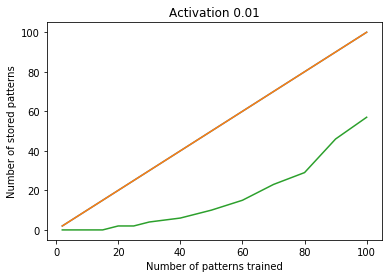

In [121]:
plt.plot(batch_sizes, conv_01)
plt.plot(batch_sizes, conv_05)
plt.plot(batch_sizes, conv_1)
plt.xlabel("Number of patterns trained")
plt.ylabel("Number of stored patterns")
plt.title("Activation 0.01")

Text(0.5, 1.0, 'Activation 0.05')

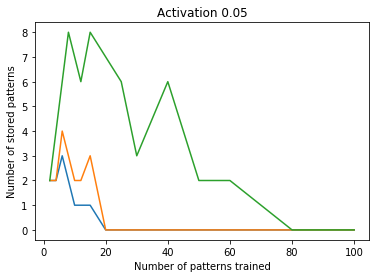

In [116]:
plt.plot(batch_sizes, conv_01)
plt.plot(batch_sizes, conv_05)
plt.plot(batch_sizes, conv_1)
plt.xlabel("Number of patterns trained")
plt.ylabel("Number of stored patterns")
plt.title("Activation 0.05")

Text(0.5, 1.0, 'Activation 0.1')

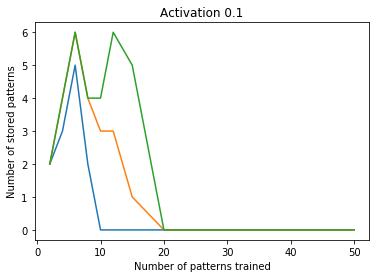

In [99]:
plt.plot(batch_sizes, conv_01)
plt.plot(batch_sizes, conv_05)
plt.plot(batch_sizes, conv_1)
plt.xlabel("Number of patterns trained")
plt.ylabel("Number of stored patterns")
plt.title("Activation 0.1")

0.1 act => 249-277

In [72]:
hop_net.avg_act

0.1

In [73]:
from tqdm import tqdm
act_percent = 0.01
X = sparse_pattern(100, act_percent).T
for p in range(299):
    x = sparse_pattern(100, act_percent)
    X = np.concatenate((X, x.T), axis = 1)

hop_net = Hopfield_Net(X)
hop_net.update_type = 'asyn'

conv_001 = []
bias_001 = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 3, 4, 5]
for bias in bias_001:
    hop_net.nr_converge = 0
    for x_id in tqdm(range(hop_net.N)):
        hop_net.bias = bias
        hop_net.net_out(np.copy(hop_net.X[:,x_id].reshape(1, hop_net.D)))
    print("Number of stored (out of 300): {}, with bias: {}".format(hop_net.nr_converge, bias))
    conv_001.append(hop_net.nr_converge)


 44%|████▍     | 133/300 [00:00<00:00, 630.68it/s]

Number of stored (out of 300): 298, with bias: 0.01


 19%|█▉        | 57/300 [00:00<00:00, 567.00it/s]

Number of stored (out of 300): 295, with bias: 0.1


 50%|█████     | 151/300 [00:00<00:00, 777.86it/s]

Number of stored (out of 300): 294, with bias: 0.3


 26%|██▌       | 78/300 [00:00<00:00, 778.53it/s]

Number of stored (out of 300): 297, with bias: 0.5


 27%|██▋       | 82/300 [00:00<00:00, 818.14it/s]

Number of stored (out of 300): 298, with bias: 0.7


 27%|██▋       | 80/300 [00:00<00:00, 792.10it/s]

Number of stored (out of 300): 300, with bias: 0.9


 49%|████▉     | 148/300 [00:00<00:00, 745.46it/s]

Number of stored (out of 300): 300, with bias: 1


 48%|████▊     | 145/300 [00:00<00:00, 686.08it/s]

Number of stored (out of 300): 298, with bias: 2


 26%|██▌       | 78/300 [00:00<00:00, 709.73it/s]

Number of stored (out of 300): 299, with bias: 3


 34%|███▎      | 101/300 [00:00<00:00, 472.82it/s]

Number of stored (out of 300): 297, with bias: 4


100%|██████████| 300/300 [00:00<00:00, 557.98it/s]

Number of stored (out of 300): 294, with bias: 5


In [74]:
from tqdm import tqdm
act_percent = 0.05
X = sparse_pattern(100, act_percent).T
for p in range(299):
    x = sparse_pattern(100, act_percent)
    X = np.concatenate((X, x.T), axis = 1)

hop_net = Hopfield_Net(X)
hop_net.update_type = 'asyn'

conv_005 = []
bias_005 = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 3, 4, 5]
for bias in bias_005:
    hop_net.nr_converge = 0
    for x_id in tqdm(range(hop_net.N)):
        hop_net.bias = bias
        hop_net.net_out(np.copy(hop_net.X[:,x_id].reshape(1, hop_net.D)))
    print("Number of stored (out of 300): {}, with bias: {}".format(hop_net.nr_converge, bias))
    conv_005.append(hop_net.nr_converge)



 15%|█▍        | 44/300 [00:00<00:00, 426.77it/s]

Number of stored (out of 300): 267, with bias: 0.01


 19%|█▉        | 57/300 [00:00<00:00, 562.78it/s]

Number of stored (out of 300): 282, with bias: 0.1


 20%|██        | 60/300 [00:00<00:00, 587.63it/s]

Number of stored (out of 300): 287, with bias: 0.3


 14%|█▎        | 41/300 [00:00<00:00, 395.53it/s]

Number of stored (out of 300): 275, with bias: 0.5


 15%|█▍        | 44/300 [00:00<00:00, 436.09it/s]

Number of stored (out of 300): 288, with bias: 0.7


 36%|███▌      | 107/300 [00:00<00:00, 535.27it/s]

Number of stored (out of 300): 286, with bias: 0.9


 18%|█▊        | 55/300 [00:00<00:00, 546.71it/s]

Number of stored (out of 300): 284, with bias: 1


 42%|████▏     | 126/300 [00:00<00:00, 558.85it/s]

Number of stored (out of 300): 280, with bias: 2


 19%|█▉        | 57/300 [00:00<00:00, 537.85it/s]

Number of stored (out of 300): 282, with bias: 3


 31%|███       | 92/300 [00:00<00:00, 475.98it/s]

Number of stored (out of 300): 288, with bias: 4


100%|██████████| 300/300 [00:00<00:00, 448.81it/s]

Number of stored (out of 300): 282, with bias: 5


0.01 act => 295-299

In [75]:
hop_net.avg_act

0.05

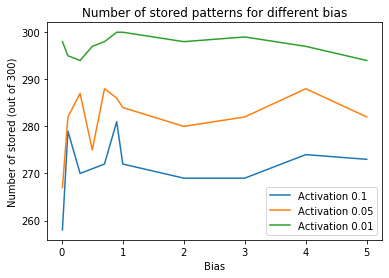

In [76]:
plt.plot(bias_01, conv_01, label = "Activation 0.1")
plt.plot(bias_005, conv_005, label = "Activation 0.05")
plt.plot(bias_001, conv_001, label = "Activation 0.01")
plt.legend(loc = "lower right")
plt.xlabel("Bias")
plt.ylabel("Number of stored (out of 300)")
plt.title("Number of stored patterns for different bias")
plt.show()

In [135]:
hop_net.net_out(np.copy(hop_net.X[:,5].reshape(1, hop_net.D))) - hop_net.X[:,5].reshape(1, hop_net.D)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [110]:
test = np.copy(hop_net.X[:,3].reshape(1, hop_net.D))

In [111]:
test[0][0] = 0

In [112]:
hop_net.net_out(np.copy(test))

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]])